image size is : (2912, 2912, 3)
number of channels is : 3
type of image is : uint8
image storage is M*N*8 = 67837952


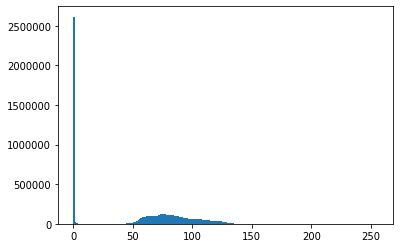

In [20]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math 

img=cv.imread('retina.jpg')
print('image size is :' , img.shape)
print('number of channels is :' , len(img.shape))
print('type of image is :', img.dtype)
#A image storage
print ('image storage is M*N*8 =' , img.shape[0]*img.shape[1]*8)
img=cv.imread('retina.jpg',0)

#B Histogram Plot
plt.hist(img.ravel(),256,[0,256]) 

#C reading sub image image in gary mode and calculate histogram for that
img1=cv.imread('retina_sub.jpg',0)
h1 = cv.calcHist([img1],[0],None,[256],[0,256])
cv.normalize(h1, h1, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)

# define some value for calculating diffrence between "retina" and "retina_sub"'s histograms 
max = 0 
x = 0
y = 0
# find "retina_sub" image in "retina" iamge 
for i in range (0,img.shape[0] - img1.shape[0],100):
    for j in range(0,img.shape[1] - img1.shape[1],100):
        s = img[i : i + img1.shape[0] , j : j + img1.shape[1]]
        h2 = cv.calcHist([s],[0],None,[256],[0,256])
        cv.normalize(h2, h2, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)
        d = 0
        for k in range(len(h2)):
            d = d + min(h1[k],h2[k])
        if d >= max :
            max = d 
            x = i
            y = j

s = img[x : x + img1.shape[0] , y : y + img1.shape[1]]
cv.imshow('similar image',s)
plt.show()
cv.waitKey(0)
cv.destroyAllWindows()